# <font  color = "#0093AF"> Quadrupolar phenomena

Membrane properties are often characterized by measurement of residual dipole or quadrupole couplings. For example, the $^2$H quadrupole spliting (difference between maxima) in a membrane aliphatic chain is approximately 170 kHz when rigid, but symmetric rotation about the membrane normal already reduces that value by half. Additional motion reduces this value further, yielding a order parameters (scaling factors) fro 0.01-0.2 in pure POPC.

In more complex membranes, it can be the case that lipids exchange environments, leading to complex lineshapes coming from both environments, with potential broadening depending on the rate of exchange.

## Setup

In [1]:
# SETUP SLEEPY
import os
os.chdir('../../../')

In [2]:
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

## Build the system

In [3]:
ex0=sl.ExpSys(v0H=600,Nucs='2H',vr=0,pwdavg='bcr400')
ex0.set_inter('quadrupole',i=0,DelPP=167e3*.15)
ex1=ex0.copy()
ex1.set_inter('quadrupole',i=0,DelPP=167e3*.3)

L=sl.Liouvillian(ex0,ex1,kex=sl.Tools.twoSite_kex(tc=5e-5,p1=.5))

## Propagate the system, plot

State-space reduction: 18->4


<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

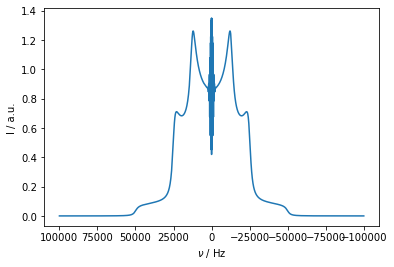

In [4]:
seq=L.Sequence(Dt=5e-6)
rho=sl.Rho('2Hx','2Hp')

rho.DetProp(seq,n=4096)
rho.apod_pars['WDW']='em'
rho.apod_pars['LB']=100
rho.plot(FT=True,apodize=True)

Note the behavior at the central frequency comes from couplings oriented near the magic angle, where the change in the size of the quadrupole coupling has little influence on the resonance frequency, and so very little relaxation is induced at these orientations. 

If we change the exchange rate, we go between regimes having two distinct shapes and a fully averaged shape.

State-space reduction: 18->4
State-space reduction: 18->4


<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

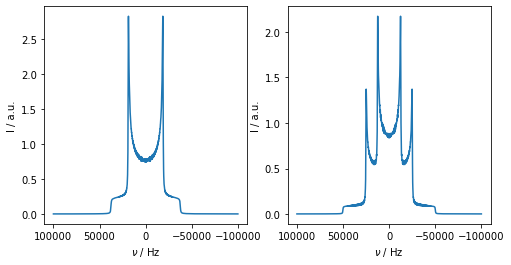

In [5]:
#seq=L.Sequence(Dt=5e-6)

fig,ax=plt.subplots(1,2)
fig.set_size_inches([8,4])

L.kex=sl.Tools.twoSite_kex(tc=1e-7)

rho=sl.Rho('2Hx','2Hp')

rho.DetProp(seq,n=4096)
rho.apod_pars['WDW']='em'
rho.apod_pars['LB']=500
rho.plot(FT=True,apodize=True,ax=ax[0])

L.kex=sl.Tools.twoSite_kex(tc=1e-1)

rho=sl.Rho('2Hx','2Hp')

rho.DetProp(seq,n=4096)
rho.apod_pars['WDW']='em'
rho.apod_pars['LB']=500
rho.plot(FT=True,apodize=True,ax=ax[1])

## Second order quadrupolar broadening in the lab frame
Half-integer spins produce a narrow peak in the middle of the quadrupolar spectrum. However, this peak is broadened by the second-order quadrupole coupling. Simulating this broadening presents a challenge for most simulation packages, because it is a rank-4 tensor, making its transformation under rotation more complicated than the rank-2 tensors that most simulation packages are setup to handle. However, if the quadrupolar interaction is simulated in the lab frame, the second order quadrupole coupling arises naturally. We demonstrate here, with one simulation in the rotating frame, and one in the lab frame.

In [6]:
exRF=sl.ExpSys(250,Nucs='17O',vr=60000,pwdavg=sl.PowderAvg('bcr100',gamma_encoded=True))
exRF.set_inter('quadrupole',i=0,delta=150000)
seqRF=exRF.Liouvillian().Sequence()
rhoRF=sl.Rho('17Ox','17Op')
rhoRF.DetProp(seqRF,n=16000,n_per_seq=32)

exLF=sl.ExpSys(250,Nucs='17O',vr=60000,LF=True,pwdavg=sl.PowderAvg('bcr100',gamma_encoded=True))
exLF.set_inter('quadrupole',i=0,delta=150000)
seqLF=exLF.Liouvillian().Sequence()
rhoLF=sl.Rho('17Ox','17Op')
_=rhoLF.DetProp(seqLF,n=16000,n_per_seq=32)

State-space reduction: 36->5
Prop: 32 steps per every 1 rotor period
Prop: 32 steps per every 1 rotor period


Note that if we observe transverse magnetization when it is in the lab frame, it will oscillate with the 

Already downmixed


(-50.0, 200.0)

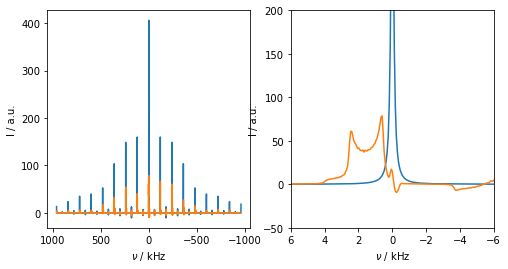

In [8]:
ax=plt.subplots(1,2,figsize=[8,4])[1]
rhoRF.plot(FT=True,apodize=True,axis='kHz',ax=ax[0])
rhoRF.plot(FT=True,apodize=True,axis='kHz',ax=ax[1])
rhoLF.downmix()
rhoLF.plot(FT=True,apodize=True,axis='kHz',ax=ax[0])
rhoLF.plot(FT=True,apodize=True,axis='kHz',ax=ax[1])
ax[1].set_xlim([6,-6])
_=ax[1].set_ylim([-50,200])